In [24]:
import numpy as np 
from scipy import fftpack 
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")

In [25]:
df = pd.read_csv("/Users/kyungyunlee/Desktop/PYTHON_FOLDER/data.csv")
df

,time,y_value
0,0.004076,355
1,0.230173,920
2,0.230173,920
3,0.230173,726
4,0.230173,0
...,...,...
87,6.776997,371
88,6.776997,469
89,6.776997,397
90,6.914278,345


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     92 non-null     float64
 1   y_value  92 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [27]:
df.describe()

,time,y_value
count,92.000000,92.000000
mean,3.596107,394.804348
std,2.062366,102.175806
min,0.004076,0.000000
25%,1.982624,356.750000
50%,3.532625,377.500000
75%,5.249583,398.500000
max,7.053197,920.000000


In [31]:
time_vec = df["time"]
time_vec = time_vec.to_list()
time_vec

[0.004076,
 0.230173,
 0.230173,
 0.230173,
 0.230173,
 0.230173,
 0.361718,
 0.361718,
 0.494089,
 0.625705,
 0.625705,
 0.756815,
 0.889111,
 1.017148,
 1.166969,
 1.309582,
 1.442449,
 1.587594,
 1.718859,
 1.850641,
 1.850641,
 1.850641,
 1.982624,
 1.982624,
 2.115913,
 2.115913,
 2.251797,
 2.392289,
 2.392289,
 2.392289,
 2.529904,
 2.529904,
 2.671367,
 2.671367,
 2.820552,
 2.820552,
 2.820552,
 2.958503,
 2.958503,
 2.958503,
 3.10507,
 3.244239,
 3.390563,
 3.390563,
 3.390563,
 3.532625,
 3.532625,
 3.676343,
 3.676343,
 3.806819,
 3.939531,
 3.939531,
 4.079713,
 4.221949,
 4.361976,
 4.361976,
 4.503417,
 4.503417,
 4.503417,
 4.637236,
 4.637236,
 4.784568,
 4.784568,
 4.784568,
 4.928813,
 5.074325,
 5.074325,
 5.214455,
 5.214455,
 5.354967,
 5.490673,
 5.490673,
 5.631938,
 5.775118,
 5.915936,
 6.061919,
 6.061919,
 6.061919,
 6.207743,
 6.207743,
 6.347093,
 6.347093,
 6.488108,
 6.488108,
 6.629134,
 6.629134,
 6.629134,
 6.776997,
 6.776997,
 6.776997,
 6.914278,


In [80]:
sig = df["y_value"]
sig = np.where(sig > 550, 0, sig)
sig

array([355,   0,   0,   0,   0, 387, 370, 392, 374, 374, 337, 337, 358,
       372, 358, 358, 433, 344, 338, 434, 337, 369, 423, 379, 357, 385,
       357, 369, 469, 396, 381, 469, 379, 338, 393, 379, 338, 444, 357,
       389, 376, 359, 359, 403, 389, 435, 390, 423, 359, 373, 421, 356,
       382, 349, 395, 349, 359, 473, 386, 371, 474, 354, 408, 396, 354,
       380, 431, 361, 392, 349, 421, 349, 396, 346, 339, 434, 339, 370,
       480, 379, 391, 354, 415, 355, 364, 471, 391, 371, 469, 397, 345,
       345])

In [81]:
sig_fft = fftpack.fft(sig)
sig_fft

array([ 3.37560000e+04   -0.j        , -1.71601331e+03 +463.28907041j,
       -1.40359700e+03 +770.73897383j, -1.04305095e+03+1039.46485183j,
       -1.15449888e+03+1001.46997684j, -1.23859013e+03 +949.90257777j,
       -4.69783147e+02+1203.77121057j, -8.23613392e+02+1064.37489205j,
       -4.09415875e+02+1283.66288391j, -3.87271371e+02+1484.18124924j,
       -9.93857128e+01 +859.44393071j,  9.64765659e+00 +864.83644238j,
        5.96209884e+02 +950.13197478j,  6.73100148e+02 +248.98646755j,
        5.66837139e+02 +558.46977216j,  4.71197449e+02 +301.08682205j,
        4.52043533e+02 +272.99895412j,  3.97609923e+02  -93.16442437j,
        3.79517182e+02  -70.00470457j,  1.55568001e+02  -57.56972351j,
        2.54754251e+02 -206.48447379j,  3.03841715e+02 -246.35665539j,
        2.71651911e+01 +114.74730024j, -5.10000000e+01  -21.j        ,
        1.82959916e+02 -276.20651999j, -9.22653887e+01 -273.79337298j,
        2.98079990e+02   +5.82292904j,  1.43313083e+02 +464.26678865j,
      

In [82]:
amplitude = np.abs(sig_fft)

In [83]:
power = amplitude ** 2

In [84]:
angle = np.angle(sig_fft)

In [85]:
sample_freq = fftpack.fftfreq(sig.size)
print(sample_freq)

[ 0.          0.01086957  0.02173913  0.0326087   0.04347826  0.05434783
  0.06521739  0.07608696  0.08695652  0.09782609  0.10869565  0.11956522
  0.13043478  0.14130435  0.15217391  0.16304348  0.17391304  0.18478261
  0.19565217  0.20652174  0.2173913   0.22826087  0.23913043  0.25
  0.26086957  0.27173913  0.2826087   0.29347826  0.30434783  0.31521739
  0.32608696  0.33695652  0.34782609  0.35869565  0.36956522  0.38043478
  0.39130435  0.40217391  0.41304348  0.42391304  0.43478261  0.44565217
  0.45652174  0.4673913   0.47826087  0.48913043 -0.5        -0.48913043
 -0.47826087 -0.4673913  -0.45652174 -0.44565217 -0.43478261 -0.42391304
 -0.41304348 -0.40217391 -0.39130435 -0.38043478 -0.36956522 -0.35869565
 -0.34782609 -0.33695652 -0.32608696 -0.31521739 -0.30434783 -0.29347826
 -0.2826087  -0.27173913 -0.26086957 -0.25       -0.23913043 -0.22826087
 -0.2173913  -0.20652174 -0.19565217 -0.18478261 -0.17391304 -0.16304348
 -0.15217391 -0.14130435 -0.13043478 -0.11956522 -0.10869

In [86]:
amp_freq = np.array([amplitude, sample_freq])

In [87]:
amp_position = amp_freq[0,:].argmax()

In [88]:
peak_freq = amp_freq[1, amp_position]

In [89]:
high_freq_fft = sig_fft.copy()

In [90]:
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0

In [91]:
filttered_sig = fftpack.ifft(high_freq_fft)
filttered_sig

array([366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j, 366.91304348+0.j, 366.91304348+0.j,
       366.91304348+0.j,

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


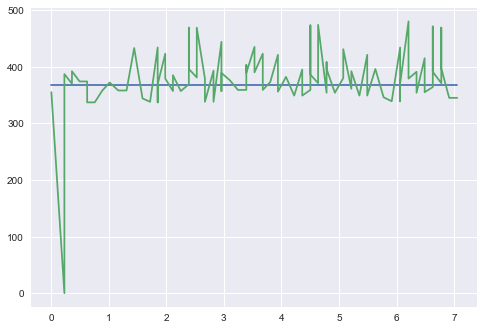

In [92]:
plt.plot(time_vec, filttered_sig)
plt.plot(time_vec, sig)
plt.show()